In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
df = pd.read_csv("mobilenetv2V3.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
19526,rmsprop,40.400,58.275,37.8345,2,261.0018,16,0.06478,0.97917
19527,adadelta,43.700,56.175,33.7275,2,304.5021,11,0.84378,0.48438
19528,adagrad,36.900,52.675,39.6260,2,261.0018,11,0.33959,0.80729
19529,adam,42.475,33.825,37.9678,2,174.0012,15,0.06080,0.97917


In [4]:
df.optimizer.value_counts()

adagrad     2442
adam        2442
adamax      2442
ftrl        2441
nadam       2441
sgd         2441
rmsprop     2441
adadelta    2441
Name: optimizer, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19531 entries, 0 to 19530
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    19531 non-null  object 
 1   cpu          19531 non-null  float64
 2   memory       19531 non-null  float64
 3   time         19531 non-null  float64
 4   epochs       19531 non-null  int64  
 5   predictions  19531 non-null  float64
 6   dataset      19531 non-null  int64  
 7   loss         19531 non-null  float64
 8   accuracy     19531 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [7]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,19531.000000,19531.000000,19531.000000,19531.0,19531.000000,19531.000000,19531.000000,19531.000000
mean,51.376916,61.945620,32.921748,2.0,239.471043,14.471712,0.233792,0.885542
std,7.601574,17.257176,5.768514,0.0,124.428265,2.683369,0.234912,0.156910
min,20.550000,15.925000,22.571000,2.0,43.500300,1.000000,0.004010,0.187500
25%,46.300000,50.000000,28.091500,2.0,130.500900,15.000000,0.086075,0.890620
50%,52.400000,61.400000,31.595900,2.0,217.501500,15.000000,0.130960,0.953120
75%,57.200000,78.000000,37.454650,2.0,348.002400,16.000000,0.279240,0.968750
max,81.400000,82.925000,58.564600,2.0,435.003100,16.000000,1.291500,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [9]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


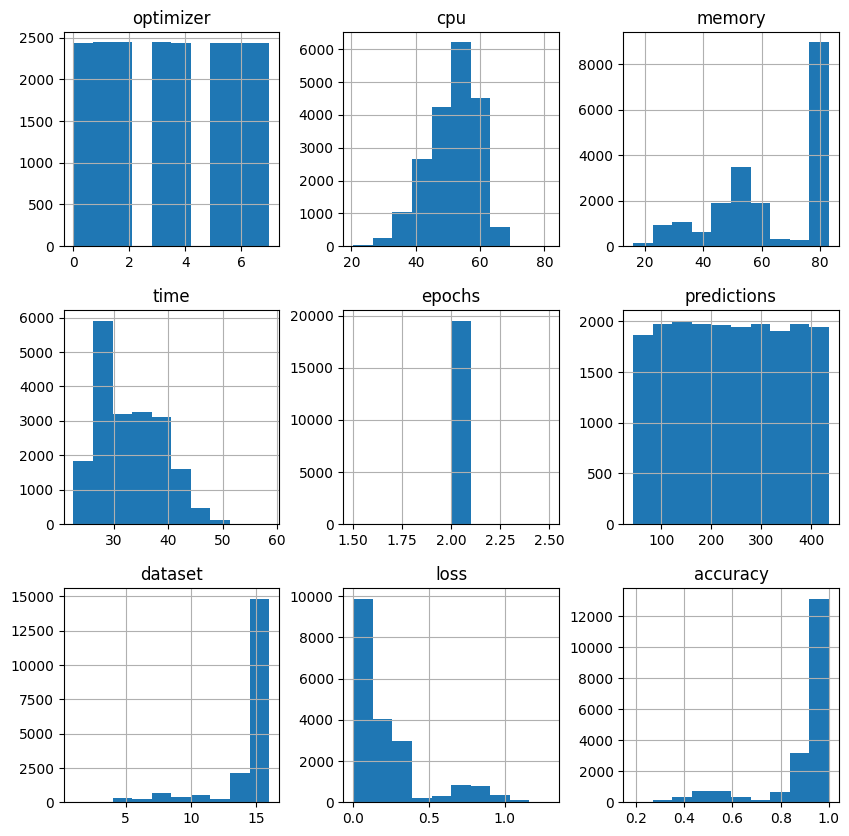

In [10]:
plot = df.hist(figsize=(10,10))

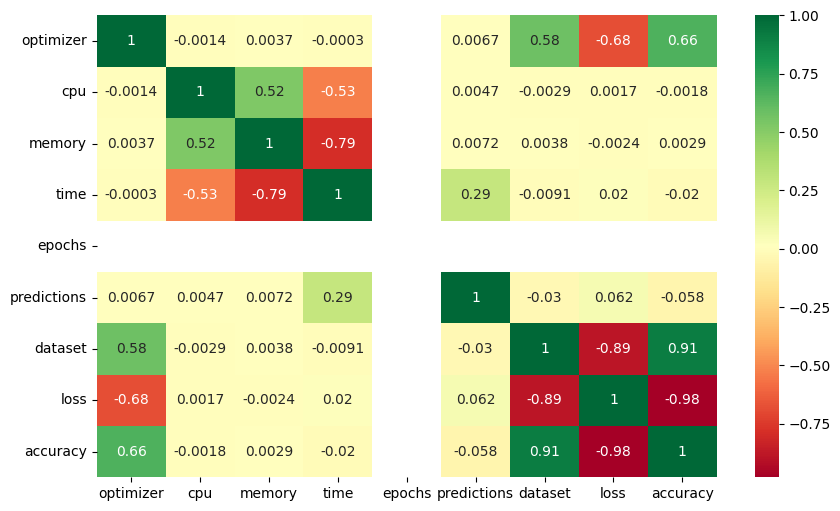

In [11]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [12]:
X = df[['dataset','loss','accuracy','time','cpu','memory','predictions']]
y = df['optimizer']

In [13]:
X.head()

,dataset,loss,accuracy,time,cpu,memory,predictions
0,15,0.29111,0.86458,26.9857,81.400,78.475,304.5021
1,16,0.06496,0.98438,32.0057,77.775,61.225,304.5021
2,15,0.07996,0.97396,46.2330,45.275,52.975,87.0006
3,15,0.30984,0.86979,32.9408,62.925,51.200,435.0031
4,15,0.11819,0.95312,30.7948,64.925,28.575,87.0006


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
X_train

array([[ 0.19630455, -0.34286061,  0.29866532, ..., -1.5336847 ,
        -0.71066975,  0.16843954],
       [ 0.57066582, -0.42833183,  0.4313913 , ...,  0.55788117,
         1.00202496,  0.16843954],
       [ 0.57066582, -0.65275227,  0.564181  , ..., -1.22077327,
        -0.3797423 , -1.23204495],
       ...,
       [ 0.57066582, -0.90703872,  0.63057584, ...,  0.75221563,
         0.90187586,  0.16843954],
       [ 0.57066582, -0.58519214,  0.49778615, ...,  1.44720839,
         0.96138475, -0.18168158],
       [ 0.57066582, -0.7152071 ,  0.63057584, ..., -0.70693976,
        -0.08074644, -1.58216607]])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
tree = DecisionTreeClassifier(max_depth=7)

tree.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.571
Test set score: 0.561
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       613
           1       0.76      0.72      0.74       612
           2       0.41      0.05      0.08       613
           3       0.56      0.82      0.67       601
           4       0.73      0.79      0.76       616
           5       0.35      0.11      0.16       612
           6       0.66      0.24      0.35       602
           7       0.28      0.77      0.41       614

    accuracy                           0.56      4883
   macro avg       0.59      0.56      0.52      4883
weighted avg       0.59      0.56      0.52      4883



In [19]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.615
Test set score: 0.568
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       613
           1       0.80      0.72      0.76       612
           2       0.27      0.18      0.22       613
           3       0.58      0.82      0.68       601
           4       0.74      0.83      0.78       616
           5       0.31      0.37      0.34       612
           6       0.58      0.23      0.33       602
           7       0.30      0.38      0.34       614

    accuracy                           0.57      4883
   macro avg       0.57      0.57      0.55      4883
weighted avg       0.57      0.57      0.56      4883



In [20]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.489
2,accuracy,0.345
0,dataset,0.118
6,predictions,0.018
3,time,0.014
4,cpu,0.008
5,memory,0.008


In [42]:
xg = XGBClassifier(n_estimators=15)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.658
Test set score: 0.588
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       613
           1       0.82      0.75      0.79       612
           2       0.28      0.22      0.25       613
           3       0.62      0.85      0.72       601
           4       0.77      0.85      0.80       616
           5       0.33      0.37      0.35       612
           6       0.66      0.27      0.38       602
           7       0.31      0.39      0.34       614

    accuracy                           0.59      4883
   macro avg       0.60      0.59      0.58      4883
weighted avg       0.60      0.59      0.58      4883



In [22]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.539
2,accuracy,0.205
6,predictions,0.105
0,dataset,0.067
3,time,0.032
5,memory,0.028
4,cpu,0.025


In [23]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.6, max_iter=500)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.542
Test set score: 0.531
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       613
           1       0.80      0.74      0.77       612
           2       0.22      0.16      0.18       613
           3       0.58      0.78      0.66       601
           4       0.75      0.83      0.79       616
           5       0.31      0.27      0.29       612
           6       0.19      0.21      0.20       602
           7       0.30      0.26      0.28       614

    accuracy                           0.53      4883
   macro avg       0.52      0.53      0.52      4883
weighted avg       0.52      0.53      0.52      4883



Neural Networks

In [24]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded)

In [25]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [26]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=64, callbacks=[early_stopping], validation_data=(X_test_nn, y_test_nn))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/200
229/229 [==============================] - 5s 10ms/step - loss: 1.5004 - accuracy: 0.4043 - val_loss: 2.3060 - val_accuracy: 0.1253
Epoch 2/200
229/229 [==============================] - 2s 8ms/step - loss: 1.1530 - accuracy: 0.4960 - val_loss: 1.3403 - val_accuracy: 0.4075
Epoch 3/200
229/229 [==============================] - 2s 9ms/step - loss: 1.0825 - accuracy: 0.5215 - val_loss: 1.5184 - val_accuracy: 0.3940
Epoch 4/200
229/229 [==============================] - 2s 8ms/step - loss: 1.0496 - accuracy: 0.5358 - val_loss: 0.9611 - val_accuracy: 0.5548
Epoch 5/200
229/229 [==============================] - 2s 9ms/step - loss: 1.0274 - accuracy: 0.5445 - val_loss: 1.5462 - val_accuracy: 0.4102
Epoch 6/200
229/229 [==============================] - 2s 8ms/step - loss: 1.0217 - accuracy: 0.5494 - val_loss: 0.9704 - val_accuracy: 0.5624
Epoch 7/200
229/229 [==============================] - 2s 8ms/step - loss: 1.0003 - accuracy: 0.5538 - val_loss: 0.9206 - val_accuracy: 0.562

Minimum validation loss: 0.895


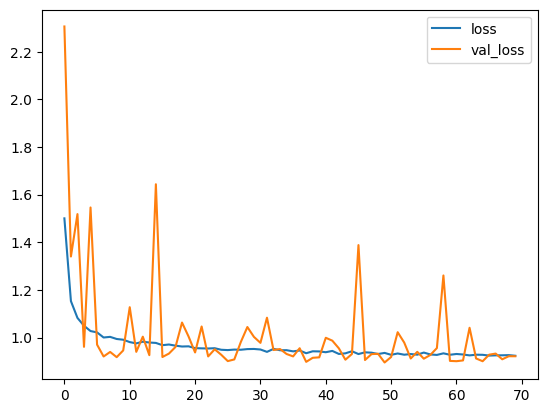

In [27]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:.3f}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.594


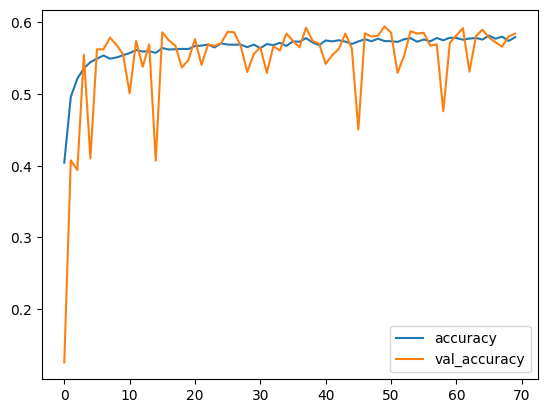

In [28]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {:.3f}".format(history_df['val_accuracy'].max()))

Saving the model

In [29]:
import os
from keras.models import load_model

# Save the trained model
model.save('model.h5')

# Save the fitted scaler and encoder objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# model.summary()

# Make predictions
def predict_best_optimizer(model, cpu, memory, dataset, loss, accuracy, time, predictions):
    input_data = np.array([[cpu, memory, dataset, loss, accuracy, time, predictions]])
    input_scaled = scaler.transform(input_data)
    probabilities = model.predict(input_scaled)
    best_optimizer_idx = np.argmax(probabilities)
    best_optimizer_onehot = np.zeros((1, probabilities.shape[1]))
    best_optimizer_onehot[0, best_optimizer_idx] = 1
    best_optimizer = encoder.inverse_transform(best_optimizer_onehot)[0][0]
    return best_optimizer

# Load the saved model
loaded_model = load_model('model.h5')
# Example usage
best_optimizer = predict_best_optimizer(loaded_model, cpu=81.4, memory=80, dataset=300,loss=0.09, accuracy=0.9, time=25, predictions=300)
print("Best optimizer:", best_optimizer)


if os.path.exists('scaler.pkl'):
  os.remove('scaler.pkl')

if os.path.exists('encoder.pkl'):
  os.remove('encoder.pkl')

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 322ms/step
Best optimizer: 0


In [43]:
import random
# Load the saved model
loaded_model = load_model('model.h5')
# Example usage
for i in range(0, 10):
    cpu = random.randint(30, 80)
    memory = random.randint(30, 80)
    dataset = random.randrange(60, 600, 60)
    time = random.randint(10, 60)
    predictions=random.randint(14, 16)
    loss, accuracy = 0.09, 0.9
    best_optimizer = predict_best_optimizer(loaded_model, cpu=cpu, memory=memory, dataset=dataset, loss=0.5, accuracy=0.5, time=time, predictions=predictions)
    print(f"cpu: {cpu}, memory: {memory}, dataset: {dataset}, loss: {loss}, accuracy: {accuracy}, time: {time}, predictions: {predictions} | optimizer #{i}:", best_optimizer)

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 185ms/step
cpu: 37, memory: 49, dataset: 180, loss: 0.09, accuracy: 0.9, time: 39, predictions: 14 | optimizer #0: 0
1/1 [==============================] - 0s 30ms/step
cpu: 74, memory: 60, dataset: 540, loss: 0.09, accuracy: 0.9, time: 43, predictions: 14 | optimizer #1: 0
1/1 [==============================] - 0s 33ms/step
cpu: 73, memory: 33, dataset: 420, loss: 0.09, accuracy: 0.9, time: 58, predictions: 14 | optimizer #2: 0


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 70, memory: 75, dataset: 480, loss: 0.09, accuracy: 0.9, time: 24, predictions: 14 | optimizer #3: 0
1/1 [==============================] - 0s 32ms/step
cpu: 61, memory: 70, dataset: 540, loss: 0.09, accuracy: 0.9, time: 50, predictions: 15 | optimizer #4: 0
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
cpu: 56, memory: 80, dataset: 540, loss: 0.09, accuracy: 0.9, time: 38, predictions: 15 | optimizer #5: 0
1/1 [==============================] - 0s 32ms/step
cpu: 49, memory: 53, dataset: 120, loss: 0.09, accuracy: 0.9, time: 39, predictions: 16 | optimizer #6: 0
1/1 [==============================] - 0s 30ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 50, memory: 79, dataset: 300, loss: 0.09, accuracy: 0.9, time: 23, predictions: 16 | optimizer #7: 0
1/1 [==============================] - 0s 36ms/step
cpu: 64, memory: 36, dataset: 300, loss: 0.09, accuracy: 0.9, time: 44, predictions: 14 | optimizer #8: 0
1/1 [==============================] - 0s 29ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 30, memory: 34, dataset: 240, loss: 0.09, accuracy: 0.9, time: 52, predictions: 16 | optimizer #9: 0
